## Load, Clean, Tokenize

* Load data
* Drop unused Columns (index column)
* Concatenate title and content of news article
* Plot dataset balance
* Tokenize
* Export Tensor for Test and Train sets to TFRecord files

In [1]:
import os

import pandas as pd
import seaborn as sns
import torch
from matplotlib.pylab import plt
from sklearn.model_selection import train_test_split

from shared import train_dataset_path, test_dataset_path, DATADIR, SEED, dataset_path

/Users/marcbruni/snu/nlp/nlp-project-2023/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Define hyperparameters
# Dataset taken from: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
# TODO: maybe download dynamically -> would require login to kaggle
TEST_SIZE = 0.1

In [3]:
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [4]:
if not os.path.exists(DATADIR):
        os.makedirs(DATADIR)

In [5]:
# Drop index numbering
df = df.drop(["Unnamed: 0"], axis=1)

# Find duplicates
raw_size = df.shape[0]
df = df.drop_duplicates()
cleaned_size = df.shape[0]
print(f"Removed {raw_size - cleaned_size} duplicates from the dataset")

# Concatenate title and text
raw_size = df.shape[0]
df["all_text"] = df["title"] + "\n\n\n\n" + df["text"]
df = df[~df["all_text"].isnull()]
cleaned_size = df.shape[0]
print(f"Removed {raw_size - cleaned_size} null values from the dataset")

print(f"Shape of the dataset: {df.shape}")

Removed 8456 duplicates from the dataset
Removed 557 null values from the dataset
Shape of the dataset: (63121, 4)


In [6]:
df.head(10)

,title,text,label,all_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,DR BEN CARSON TARGETED BY THE IRS: “I never ha...
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,Sports Bar Owner Bans NFL Games…Will Show Only...
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,Latest Pipeline Leak Underscores Dangers Of Da...
10,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1,GOP Senator Just Smacked Down The Most Puncha...


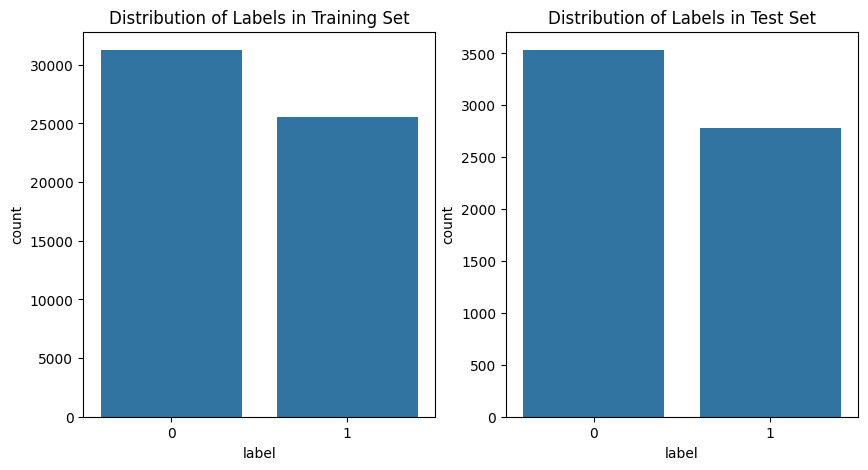

In [7]:
# Create test train split (with shuffeling)
df = df.sample(frac=1, random_state=SEED).reset_index(drop=True)
train, test = train_test_split(df, test_size=TEST_SIZE, random_state=SEED)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="label", data=train)
plt.title("Distribution of Labels in Training Set")

plt.subplot(1, 2, 2)
sns.countplot(x="label", data=test)
plt.title("Distribution of Labels in Test Set")

plt.show()

## Export

In [8]:
torch.save(train, train_dataset_path)
print(f"Training dataset saved to {train_dataset_path}")
torch.save(test, test_dataset_path)
print(f"Test dataset saved to {test_dataset_path}")

Training dataset saved to data/train_dataset.pt
Test dataset saved to data/test_dataset.pt
